# First Attempt
batch size 256 lr 1e-3

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [8]:
classTrainFeatures = basic_features
classModel = 'modelSelu'
varSet = "basic_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 10000
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'PRI_tau_pt', 'DER_deltar_tau_lep', 'PRI_jet_leading_eta', 'PRI_lep_eta', 'PRI_tau_eta', 'DER_lep_eta_centrality', 'DER_mass_jet_jet', 'DER_deltaeta_jet_jet', 'DER_pt_tot', 'DER_met_phi_centrality', 'PRI_jet_num', 'PRI_met', 'DER_pt_h', 'DER_pt_ratio_lep_tau', 'DER_sum_pt', 'PRI_jet_leading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_all_pt', 'PRI_met_sumet', 'DER_prodeta_jet_jet', 'PRI_lep_pt', 'PRI_jet_subleading_pt', 'PRI_met_phi', 'PRI_jet_leading_phi', 'PRI_lep_phi', 'PRI_jet_subleading_phi', 'PRI_tau_phi']


## Import data

In [9]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 1.215s 


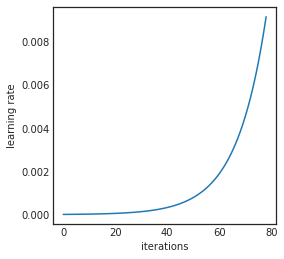

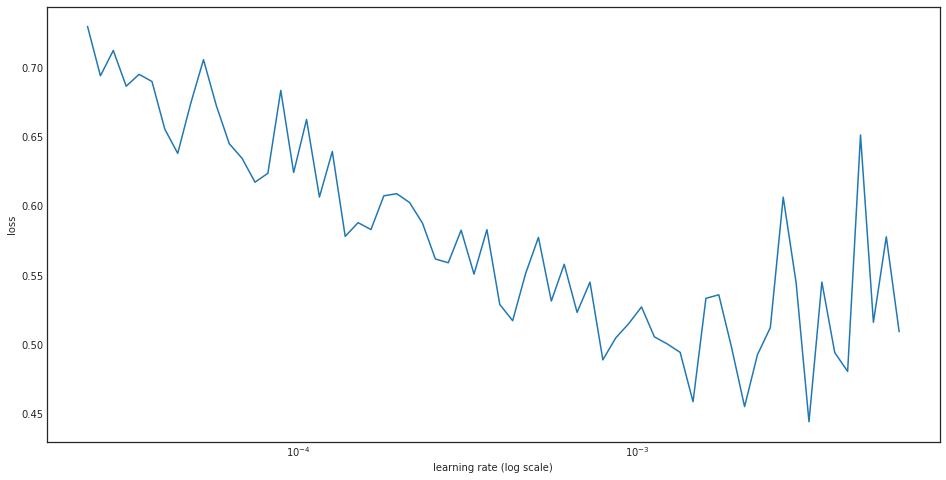

______________________________________



In [10]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-2], trainOnWeights=False, verbose=0)

In [11]:
compileArgs['lr'] = 1e-3

## Train classifier

Running fold 1 / 10
Using cosine annealing
2 classes found, running in binary mode

1 New best found: 0.462882287512
2 New best found: 0.427998435659
3 New best found: 0.408704337275
4 New best found: 0.399516054874
5 New best found: 0.396258104498
6 New best found: 0.390258984006
7 New best found: 0.388467352092
8 New best found: 0.385980126451
9 New best found: 0.385793199427
10 New best found: 0.383219760826
11 New best found: 0.381654112835
12 New best found: 0.38049812676
13 New best found: 0.378877272373
14 New best found: 0.378293529973
15 New best found: 0.376701902503
17 New best found: 0.375821836988
19 New best found: 0.374984590348
20 New best found: 0.373266656315
21 New best found: 0.372464109598
23 New best found: 0.37240252735
25 New best found: 0.371585704743
27 New best found: 0.371041130219
28 New best found: 0.370799671808
29 New best found: 0.369800833067
31 New best found: 0.369429767213
33 New best found: 0.369136492115
35 New best found: 0.368126415575
40 New be

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138938). Check your callbacks.
  % delta_t_median)


1 New best found: 0.461283863004
2 New best found: 0.424513369405
3 New best found: 0.402670001309
4 New best found: 0.396464733415
5 New best found: 0.394019518396
6 New best found: 0.386978875849
7 New best found: 0.385541841836
8 New best found: 0.383057640278
9 New best found: 0.382006282389
10 New best found: 0.378600270666
11 New best found: 0.377635858634
12 New best found: 0.376612838475
17 New best found: 0.374823097221
18 New best found: 0.373651592647
20 New best found: 0.372647431497
22 New best found: 0.372118327794
24 New best found: 0.371982592507
26 New best found: 0.371412262373
27 New best found: 0.371028077978
28 New best found: 0.370897933825
29 New best found: 0.37049658881
30 New best found: 0.369986354595
34 New best found: 0.369501718304
36 New best found: 0.369157569844
37 New best found: 0.368822238899
39 New best found: 0.36789047425
44 New best found: 0.367677525101
52 New best found: 0.367393515546
53 New best found: 0.36718077139
57 New best found: 0.36698

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123216). Check your callbacks.
  % delta_t_median)


1 New best found: 0.46272430494
2 New best found: 0.42628726314
3 New best found: 0.404536036227
4 New best found: 0.39563687
5 New best found: 0.393668290752
6 New best found: 0.386968998197
7 New best found: 0.386487659
8 New best found: 0.384543636918
9 New best found: 0.381183833446
10 New best found: 0.379361821426
11 New best found: 0.378890480326
12 New best found: 0.377289380744
13 New best found: 0.376432347178
15 New best found: 0.375271754498
16 New best found: 0.37521117883
18 New best found: 0.374057533939
21 New best found: 0.372592472905
22 New best found: 0.372374889328
25 New best found: 0.370315920423
31 New best found: 0.369655299122
33 New best found: 0.369180834624
35 New best found: 0.369090563748
36 New best found: 0.368505092437
39 New best found: 0.368489435903
41 New best found: 0.367525877673
49 New best found: 0.367041156624
55 New best found: 0.367039084725
57 New best found: 0.366147827296
58 New best found: 0.36523384325
Early stopping after 68 epochs
Sco

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132488). Check your callbacks.
  % delta_t_median)


1 New best found: 0.467349199018
2 New best found: 0.438878970329
3 New best found: 0.412817421401
4 New best found: 0.400574267479
5 New best found: 0.391847138822
6 New best found: 0.38565357598
7 New best found: 0.38275292358
8 New best found: 0.380184242904
9 New best found: 0.378912470537
10 New best found: 0.376917252053
11 New best found: 0.373929427415
13 New best found: 0.372901583053
14 New best found: 0.371233851932
16 New best found: 0.370788420484
17 New best found: 0.369623249643
18 New best found: 0.368931715209
20 New best found: 0.366980771896
22 New best found: 0.366878809072
25 New best found: 0.366788435154
26 New best found: 0.365625141921
27 New best found: 0.364140920182
29 New best found: 0.363404522858
34 New best found: 0.363318686594
35 New best found: 0.363095805202
36 New best found: 0.362649551225
37 New best found: 0.362491595864
38 New best found: 0.361119058381
41 New best found: 0.36007983469
47 New best found: 0.359930934187
56 New best found: 0.35912

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.174729). Check your callbacks.
  % delta_t_median)


1 New best found: 0.483870946116
2 New best found: 0.458630488388
3 New best found: 0.439482625927
4 New best found: 0.423095923316
5 New best found: 0.406143552485
6 New best found: 0.39850569483
7 New best found: 0.393320852921
8 New best found: 0.391569766364
9 New best found: 0.386899415334
11 New best found: 0.383927498088
12 New best found: 0.383198411708
13 New best found: 0.381612158478
14 New best found: 0.379703744997
15 New best found: 0.379538041241
16 New best found: 0.379309750805
17 New best found: 0.377690655703
19 New best found: 0.377607346199
21 New best found: 0.375723986002
22 New best found: 0.375229490398
23 New best found: 0.37508035221
24 New best found: 0.374020838241
25 New best found: 0.373553822914
27 New best found: 0.372906717666
31 New best found: 0.372588956777
32 New best found: 0.371821404407
33 New best found: 0.371707739454
35 New best found: 0.371116635121
36 New best found: 0.370925863054
38 New best found: 0.370886962384
39 New best found: 0.3705

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184289). Check your callbacks.
  % delta_t_median)


1 New best found: 0.470888239764
2 New best found: 0.44570624563
3 New best found: 0.42154624218
4 New best found: 0.405269552199
5 New best found: 0.400986711312
6 New best found: 0.395168958152
7 New best found: 0.390690311645
8 New best found: 0.388525678948
9 New best found: 0.386792115131
10 New best found: 0.383901639322
11 New best found: 0.383672287597
12 New best found: 0.38157958817
13 New best found: 0.380017201783
16 New best found: 0.378785728939
17 New best found: 0.37829851416
18 New best found: 0.378071849236
20 New best found: 0.376842125382
22 New best found: 0.375900276119
23 New best found: 0.375328656824
24 New best found: 0.375320527837
25 New best found: 0.374886958746
27 New best found: 0.374096764059
28 New best found: 0.373442451651
29 New best found: 0.373072257458
34 New best found: 0.372237559749
35 New best found: 0.371523904189
38 New best found: 0.370532073852
42 New best found: 0.370334593846
46 New best found: 0.36896008294
54 New best found: 0.3689053

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187123). Check your callbacks.
  % delta_t_median)


1 New best found: 0.472854884138
2 New best found: 0.451346723504
3 New best found: 0.432006228493
4 New best found: 0.414626920474
5 New best found: 0.406550378122
6 New best found: 0.399873903666
7 New best found: 0.393789283704
8 New best found: 0.393072535181
9 New best found: 0.390695414217
10 New best found: 0.387226802667
11 New best found: 0.38424260772
12 New best found: 0.384094145786
13 New best found: 0.383310502061
14 New best found: 0.382495162128
16 New best found: 0.379918358319
17 New best found: 0.377482177197
19 New best found: 0.377167185275
21 New best found: 0.376969236019
23 New best found: 0.375368667724
28 New best found: 0.374698745956
30 New best found: 0.374159898652
32 New best found: 0.373749330762
34 New best found: 0.373472584894
38 New best found: 0.371979552368
39 New best found: 0.371566022373
41 New best found: 0.370471504393
48 New best found: 0.369896720555
52 New best found: 0.369244449303
57 New best found: 0.369242716595
59 New best found: 0.368

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.211943). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106335). Check your callbacks.
  % delta_t_median)


1 New best found: 0.481509547116
2 New best found: 0.45890876667
3 New best found: 0.429054051831
4 New best found: 0.410923647981
5 New best found: 0.401445358464
6 New best found: 0.397692377928
7 New best found: 0.394369233548
8 New best found: 0.393738552291
9 New best found: 0.391125254198
10 New best found: 0.388169123762
11 New best found: 0.388066522761
12 New best found: 0.387741890452
13 New best found: 0.387398746674
14 New best found: 0.3862315914
16 New best found: 0.385960796457
17 New best found: 0.383764365362
19 New best found: 0.38262113474
22 New best found: 0.381997737916
23 New best found: 0.380886595932
26 New best found: 0.380788175647
27 New best found: 0.380569017606
29 New best found: 0.380521154924
30 New best found: 0.380354427666
32 New best found: 0.379807751322
35 New best found: 0.377888871987
42 New best found: 0.377775839555
43 New best found: 0.377716391788
44 New best found: 0.377404979919
45 New best found: 0.377109535793
47 New best found: 0.376862

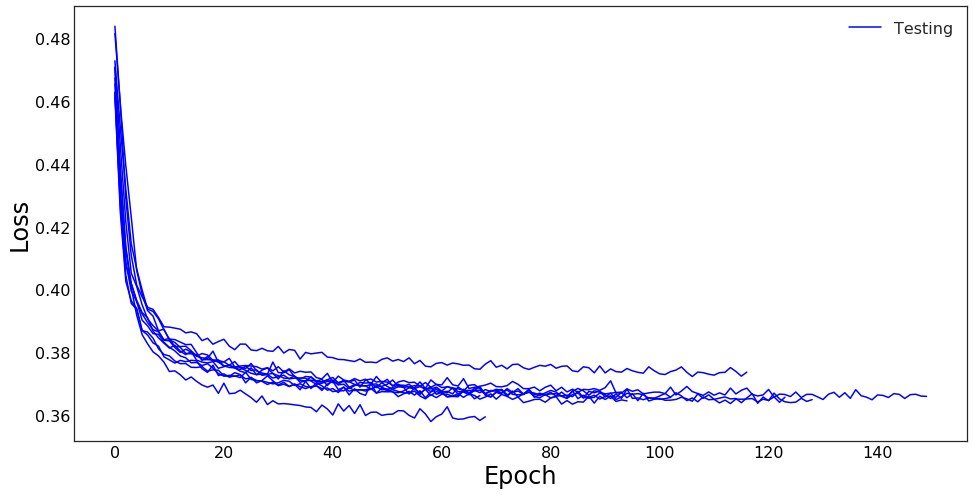

Mean wAUC = 0.0709 +- 0.0008
______________________________________



In [12]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, useCosAnneal=True, trainOnWeights=False, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [13]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [14]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 5 with loss = 0.35800321706016014
Model 1 is 0 with loss = 0.36352992146883445
Model 2 is 6 with loss = 0.3637372132084161
Model 3 is 2 with loss = 0.36381166444697494
Model 4 is 8 with loss = 0.3649332352014017
Model 5 is 1 with loss = 0.36498534355214757
Model 6 is 4 with loss = 0.36523384324987207
Model 7 is 3 with loss = 0.3658437021175996
Model 8 is 7 with loss = 0.36599327315910485
Model 9 is 9 with loss = 0.37233845944764715


## Response on training data

In [15]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000438576012598s per sample

Predicting batch 2 out of 10
Prediction took 0.000244777158859s per sample

Predicting batch 3 out of 10
Prediction took 0.000252127236148s per sample

Predicting batch 4 out of 10
Prediction took 0.000241160702705s per sample

Predicting batch 5 out of 10
Prediction took 0.000240139353275s per sample

Predicting batch 6 out of 10
Prediction took 0.000241135907173s per sample

Predicting batch 7 out of 10
Prediction took 0.000239917647839s per sample

Predicting batch 8 out of 10
Prediction took 0.000266834344677s per sample

Predicting batch 9 out of 10
Prediction took 0.000263006796008s per sample

Predicting batch 10 out of 10
Prediction took 0.000328395812415s per sample



In [16]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.909727874957, weighted 0.932333949835


## Response on val data

In [18]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000264767217636s per sample

Predicting batch 2 out of 10
Prediction took 0.000261307621002s per sample

Predicting batch 3 out of 10
Prediction took 0.000266741991043s per sample

Predicting batch 4 out of 10
Prediction took 0.000275183200836s per sample

Predicting batch 5 out of 10
Prediction took 0.000319227218628s per sample

Predicting batch 6 out of 10
Prediction took 0.000268340206146s per sample

Predicting batch 7 out of 10
Prediction took 0.000282612419128s per sample

Predicting batch 8 out of 10
Prediction took 0.000255055236816s per sample

Predicting batch 9 out of 10
Prediction took 0.000288102245331s per sample

Predicting batch 10 out of 10
Prediction took 0.000280156612396s per sample



In [21]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.906802982889, weighted 0.928972175575


## Evaluation

### Import in dataframe

In [22]:
def convertToDF(datafile, columns={'gen_target', 'gen_weight', 'pred_class'}, nLoad=-1):
    data = pandas.DataFrame()
    data['gen_target'] = getFeature('targets', datafile, nLoad)
    data['gen_weight'] = getFeature('weights', datafile, nLoad)
    data['pred_class'] = getFeature('pred', datafile, nLoad)
    print len(data), "candidates loaded"
    return data

In [23]:
devData = convertToDF(trainData)
valData = convertToDF(valData)

200000 candidates loaded
50000 candidates loaded


In [24]:
sigVal = (valData.gen_target == 1)
bkgVal = (valData.gen_target == 0)

### MVA distributions

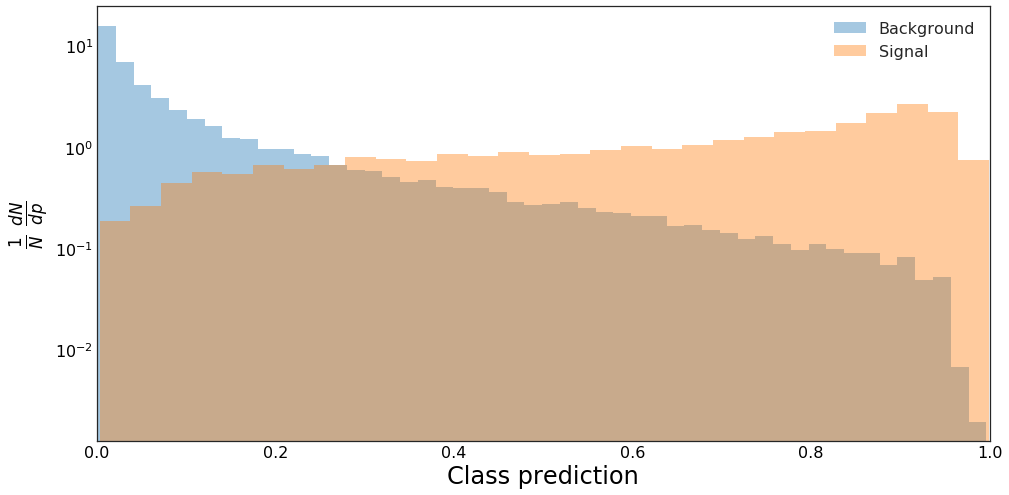

In [25]:
getClassPredPlot([valData[bkgVal], valData[sigVal]], weightName='gen_weight')

In [60]:
def amsScan(inData, res=0.0001):
    best = [0,-1]
    for i in np.linspace(0.,1.,1./res):
        ams = AMS(np.sum(inData.loc[(inData['pred_class'] >= i) & sigVal, 'gen_weight']),
                  np.sum(inData.loc[(inData['pred_class'] >= i) & bkgVal, 'gen_weight']))
        if ams > best[1]:
            best = [i, ams]
    print best

In [61]:
amsScan(valData)

/home/giles/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


[0.8518851885188519, 1.6105554979507888]


In [41]:
testData = pandas.read_csv('../Data/test.csv')

In [40]:
with open(dirLoc + 'inputPipe.pkl', 'r') as fin:
    inputPipe = pickle.load(fin)

In [42]:
testData['pred_class'] = ensemblePredict(inputPipe.transform(testData[basic_features].values.astype('float32')), ensemble, weights)

In [43]:
testData['Class'] = 'b'

In [45]:
testData.loc[testData.pred_class >= 0.8521852185218523, 'Class'] = 's'

In [48]:
testData.sort_values(by=['pred_class'], inplace=True)

In [54]:
testData['RankOrder']=range(1, len(testData)+1)

In [56]:
testData.sort_values(by=['EventId'], inplace=True)

In [57]:
testData.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,pred_class,Class,RankOrder
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0.006605,b,11536
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575,0.050831,b,145396
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0.544031,b,390425
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0.866518,s,486770
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213,0.009207,b,27052


In [59]:
testData.to_csv(dirLoc + 'Model_0_Basic_Features_256_1e-3_test.csv', columns=['EventId', 'RankOrder', 'Class'], index=False)

## Save classified data

In [ ]:
name = dirLoc + signal + "_" + channel + "_" + varSet + '_' + classModel + '_classifiedData.csv'
print "Saving data to", name
valData.to_csv(name, columns=['gen_target', 'gen_weight', 'gen_sample', 'pred_class'])

## Save/load

In [ ]:
name = "weights/DNN_" + signal + "_" + channel + "_" + varSet + '_' + classModel
print name

### Save

In [ ]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=1)

### Load

In [ ]:
ensemble, weights, compileArgs, inputPipe, outputPipe = loadEnsemble(name)